<a href="https://colab.research.google.com/github/ersmythe/MAT421/blob/main/Module_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.4 Lagrange Polynomial Interpolation
Another method for interpolation uses a Lagrange polynomial that goes through all the points (rather than piecewise functions between each set of points).
They are often set up as a linear combination of Lagrange basis polynomials, such that Pi(x) = product of (x-xj)/(xi-xj) for j=1, j≠i until n. Then, the Lagrange polynomial is L(x) = ∑yi*Pi(x).

Calculating out the Lagrange basis polynomials for x = [0,1,2] and y = [1,3,2] results in P1(x) = 0.5(x^2 - 3x + 2), P2(x) = -x^2 + 2x, and P3(x) = 0.5(x^2 - x).


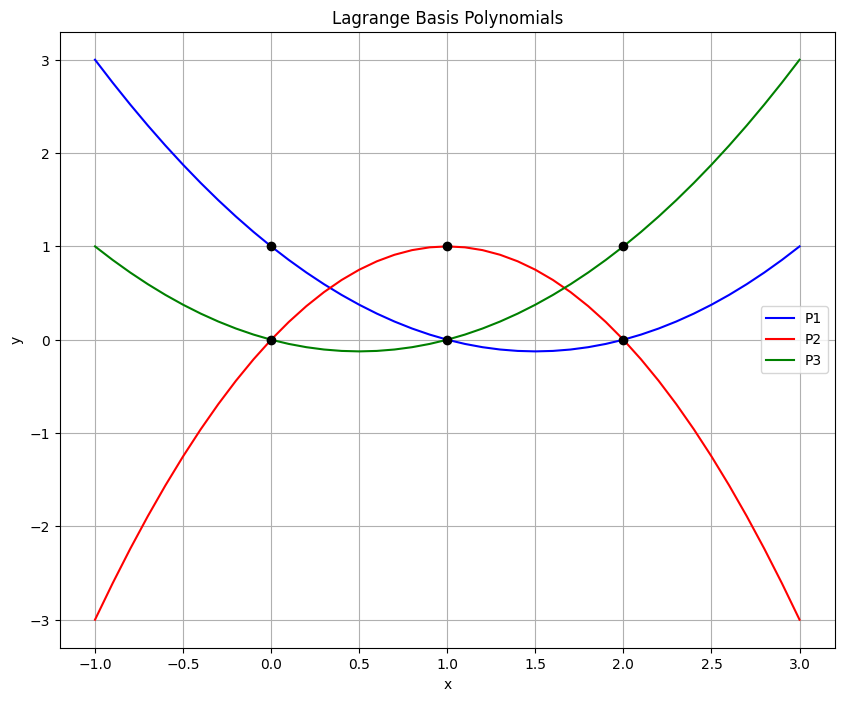

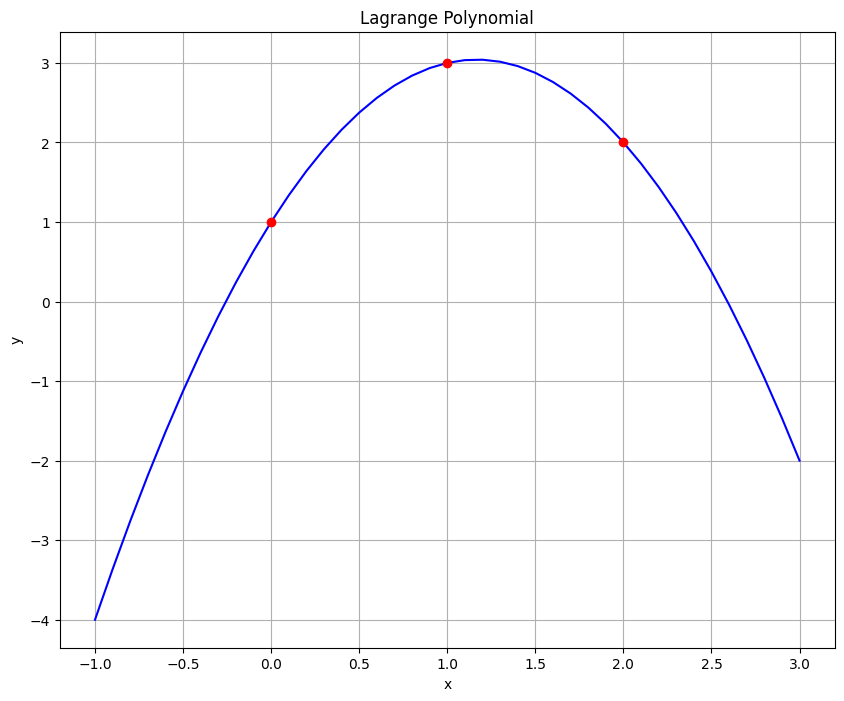

In [3]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,0.5]
P2_coeff = [0, 2, -1]
P3_coeff = [0,-0.5,0.5]

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

L = 1*P1 + 3*P2 + 2*P3 # y1*P1 + y2*P2 + y3*P3
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Notice that outside the domain of the given x, the polynomial quickly changes. For this reason, it should not be used to interpolate past the area of data.

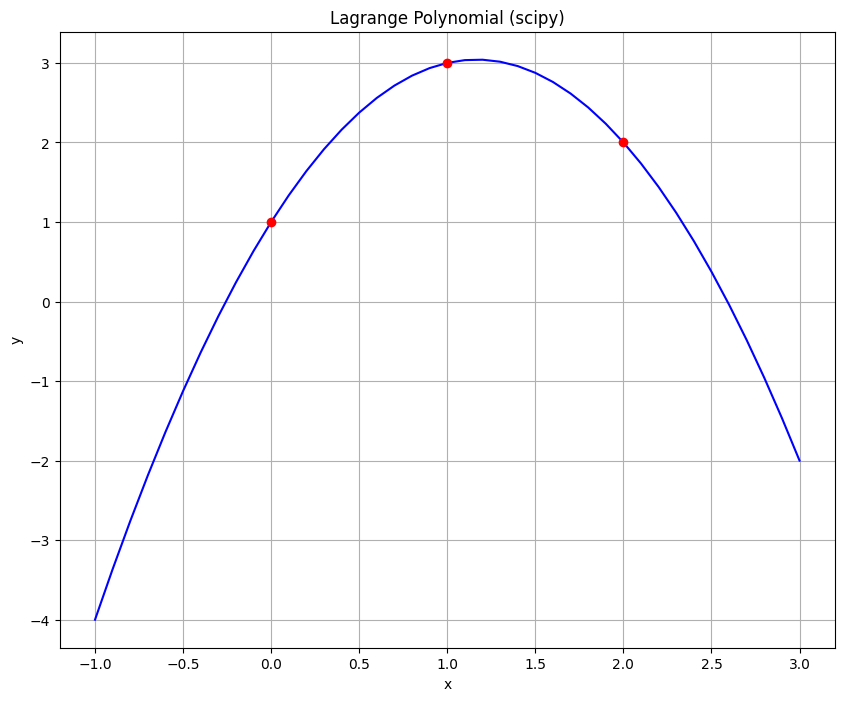

In [5]:
# scipy can also do this for us so we don't need to hand-calculate:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt
x = [0, 1, 2]
y = [1, 3, 2]
x_new = np.arange(-1.0, 3.1, 0.1)

f = lagrange(x,y)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial (scipy)')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# 17.5 Newton's Polynomial Interpolation
Newton's polynomial interpolation also works by fitting a line to a set of data points, but it uses an n-1 order Newton's polynomial instead of a Lagrange polynomial. It takes the form

f(x) = a0 + a1(x-x0) + a2(x-x0)(x-x1) + ... + an(x-x0)(x-x1)...(x-xn)
OR f(x) = ∑ai*ni(x), in which ni(x) = ∏(x-xj) from j=0 to j=i-1

The coefficients ai are simple to find. By solving for each point and rearranging, we get that a0=y0, a1=(y1-y0)/(x1-x0), and a2 = ((y2-y1)/(x2-x1)-(y1-y0)/(x1-x0))/(x2-x0). This pattern is called a divided difference.

If f[x1, x0] = (y1-y0)/(x1-x0), then f[x2, x1, x0] = (f[x2, x1] - f[x1, x0])/(x2-x1).

The general equation for this is f[xk, x)k-1), ..., x1, x0] = (f[xk,x(k-1), ..., x2, x1] - f[x(k-1), x(k-2), ..., x1, x0])/(xk-x0).



Text(0.5, 1.0, "Newton's Polynomial")

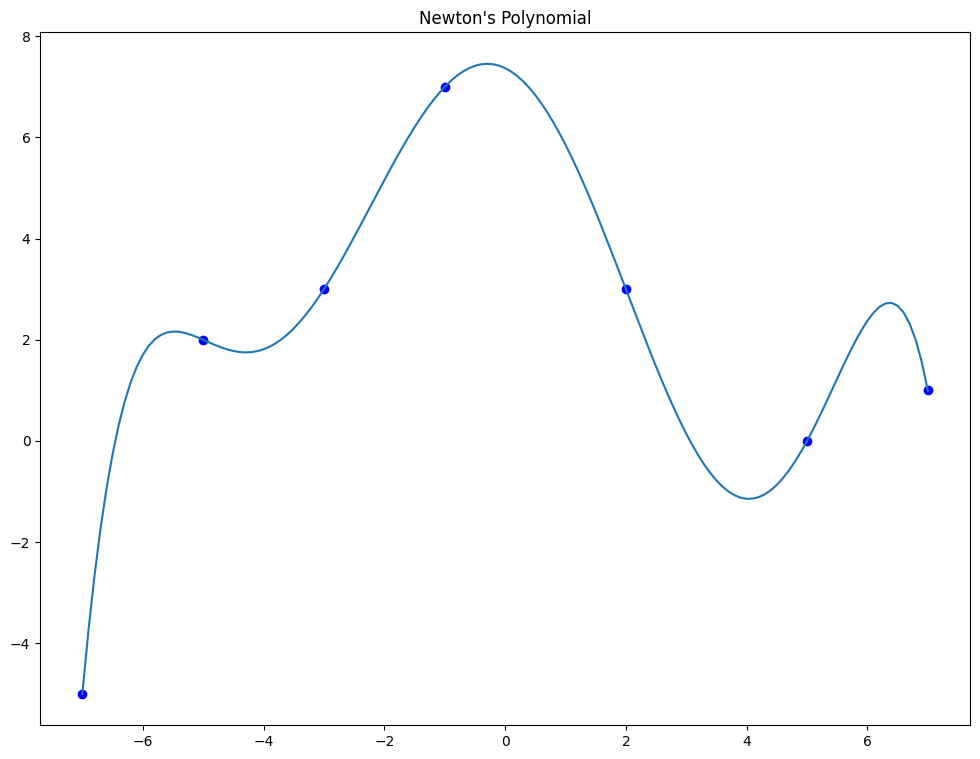

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef


def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p


x = np.array([-7, -5, -3, -1, 2, 5, 7])
y = np.array([-5, 2, 3, 7, 3, 0, 1])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-7, 7.1, 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 9))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title("Newton's Polynomial")
